https://arxiv.org/pdf/2011.11156.pdf

In [1]:
DATA_PATH = r'/home/luis-felipe/Uncertainty_Estimation/data'
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

In [2]:
import os
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


In [4]:
import NN_models as models
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data

In [5]:
from uncertainty.MonteCarlo_Dropout import MonteCarloDropout
from uncertainty.ensemble import Ensemble
import uncertainty.metrics as metrics
from uncertainty import TestAugmentation as _TTA

In [6]:
MODEL_ARC = 'VGG_16'
DATA = 'Cifar10'
NAME = MODEL_ARC +'_' + DATA 

data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
model_class = models.__dict__[MODEL_ARC]

model_path = PATH_MODELS
weights_path = os.path.join(model_path,"VGG16_10_ensemble_0.pt")

Files already downloaded and verified
Files already downloaded and verified


In [7]:
model = model_class(num_classes = data.n_classes)
state_dict = torch.load(weights_path)
model.load_state_dict(state_dict)
model.eval()
model.softmax = True
TE.model_acc(model,data.test_dataloader)

93.26

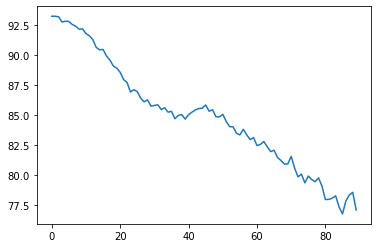

In [8]:
accs = []
i_s = range(90)
for i in i_s:
    TTA_model = _TTA.TTA(model,as_ensemble = True).to(dev)
    TTA_model.transforms = [_TTA.Rotate(i)]
    accs.append(TE.model_acc(TTA_model,data.test_dataloader))
plt.plot(i_s,accs)

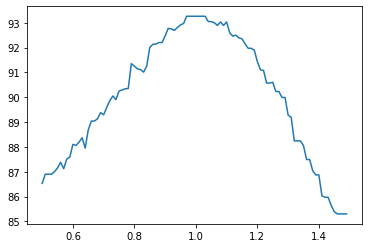

In [9]:
accs = []
i_s = np.arange(0.5,1.5,0.01)
for i in i_s:
    TTA_model = _TTA.TTA(model,as_ensemble = True).to(dev)
    TTA_model.transforms = [_TTA.Scale(i)]
    accs.append(TE.model_acc(TTA_model,data.test_dataloader))
plt.plot(i_s,accs)

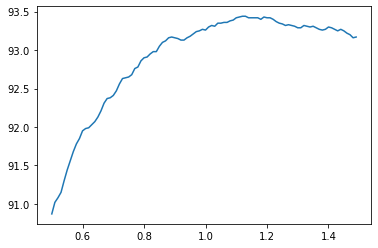

In [10]:
accs = []
i_s = np.arange(0.5,1.5,0.01)
for i in i_s:
    TTA_model = _TTA.TTA(model,as_ensemble = True).to(dev)
    TTA_model.transforms = [_TTA.Multiply(i)]
    accs.append(TE.model_acc(TTA_model,data.test_dataloader))
plt.plot(i_s,accs)

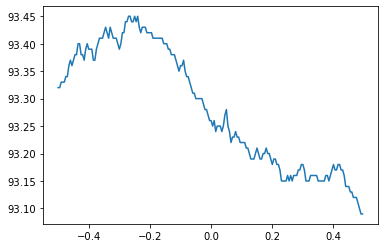

In [11]:
accs = []
i_s = np.arange(-0.5,0.5,0.005)
for i in i_s:
    TTA_model = _TTA.TTA(model,as_ensemble = True).to(dev)
    TTA_model.transforms = [_TTA.Add(i)]
    accs.append(TE.model_acc(TTA_model,data.test_dataloader))
plt.plot(i_s,accs)

In [12]:
TTA_model = _TTA.TTA(model,as_ensemble = True).to(dev)
TTA_model.transforms = [_TTA.Add(0.0)]
TE.model_acc(TTA_model,data.test_dataloader)

93.26

In [13]:
im,_ = next(iter(data.test_dataloader))

In [14]:
torch.max(im)

tensor(2.7537)

In [15]:
im

tensor([[[[ 0.6338,  0.6531,  0.7694,  ...,  0.2267,  0.0134, -0.1804],
          [ 0.5174,  0.4981,  0.6531,  ...,  0.2073, -0.0060, -0.1223],
          [ 0.4981,  0.4981,  0.6338,  ...,  0.2654,  0.0910, -0.1029],
          ...,
          [-1.1109, -1.6149, -1.8281,  ..., -1.6924, -2.1771, -1.6537],
          [-1.2466, -1.4792, -1.7506,  ..., -1.9251, -1.8669, -2.0414],
          [-1.3823, -1.3435, -1.5567,  ..., -1.9638, -1.7700, -2.0220]],

         [[-0.2156, -0.2352, -0.1369,  ..., -0.5499, -0.6286, -0.7466],
          [-0.2156, -0.2549, -0.1762,  ..., -0.5499, -0.6286, -0.6876],
          [-0.2549, -0.2746, -0.2352,  ..., -0.4909, -0.5499, -0.6679],
          ...,
          [ 0.0204, -0.4516, -0.6876,  ..., -0.5106, -1.1596, -0.7466],
          [-0.1369, -0.4122, -0.7466,  ..., -0.8056, -0.8056, -1.1596],
          [-0.3139, -0.3532, -0.6679,  ..., -0.9039, -0.7662, -1.1006]],

         [[-1.2654, -1.3044, -1.2264,  ..., -1.5190, -1.5190, -1.5776],
          [-1.2264, -1.4410, -